## Import packages

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Load dataset and basic exploration

In [2]:
# Filepath
gas_outputs_file_path = '.\derived_gas_outputs_minutes.csv'
# Store data in DataFrame, fix index, provide head of dataset
gas_df = pd.read_csv(gas_outputs_file_path, index_col='timestamp', parse_dates=['timestamp'])
gas_df.drop(gas_df.columns[0], inplace=True, axis=1)
gas_df.head()

,mean_gas_fee_cap,mean_gas_premium,mean_gas_limit,mean_gas_used,mean_parent_base_fee,mean_base_fee_burn,mean_over_estimation_burn,mean_gas_refund,mean_gas_burned
timestamp,,,,,,,,,
2021-06-01 00:00:00+00:00,8.029010e+09,101728.474840,3.853911e+07,3.154444e+07,107.508692,3.344824e+09,1.379284e+08,5.712949e+06,1.281725e+06
2021-06-01 00:01:00+00:00,5.514969e+09,101091.411072,3.551579e+07,2.902460e+07,104.134276,2.964455e+09,1.137286e+08,5.395994e+06,1.095194e+06
2021-06-01 00:02:00+00:00,1.391597e+09,101666.874747,3.925006e+07,3.176285e+07,106.288889,3.336958e+09,1.693683e+08,5.889824e+06,1.597390e+06
2021-06-01 00:03:00+00:00,1.757485e+10,97440.471254,3.993927e+07,3.258712e+07,107.122526,3.442124e+09,1.394680e+08,6.046530e+06,1.305622e+06
2021-06-01 00:04:00+00:00,6.449984e+09,100270.025472,3.896426e+07,3.207390e+07,100.000000,3.121567e+09,1.184643e+08,5.705719e+06,1.184643e+06


In [3]:
# Provide summary of fields
gas_df.describe()

,mean_gas_fee_cap,mean_gas_premium,mean_gas_limit,mean_gas_used,mean_parent_base_fee,mean_base_fee_burn,mean_over_estimation_burn,mean_gas_refund,mean_gas_burned
count,3.427300e+04,3.427300e+04,3.427300e+04,3.427300e+04,3.427300e+04,3.427300e+04,3.427300e+04,3.427300e+04,3.427300e+04
mean,9.332010e+09,1.497482e+06,3.989642e+07,3.226650e+07,6.106657e+08,1.944904e+16,1.086866e+15,5.800183e+06,1.829740e+06
std,4.525614e+09,8.109318e+06,4.347213e+06,2.210611e+06,5.208931e+08,1.674395e+16,1.332562e+15,4.845310e+05,3.401566e+06
min,5.746347e+08,8.200945e+04,2.428070e+07,1.408784e+07,1.000000e+02,2.016133e+09,7.553782e+07,2.687929e+06,6.165379e+05
25%,6.363798e+09,1.114223e+05,3.779839e+07,3.087624e+07,1.999907e+08,6.337284e+15,2.936702e+14,5.491961e+06,1.240027e+06
50%,8.880672e+09,3.657263e+05,3.932166e+07,3.202065e+07,5.404110e+08,1.728121e+16,8.453976e+14,5.752933e+06,1.498004e+06
75%,1.162421e+10,8.884868e+05,4.124140e+07,3.338107e+07,9.484614e+08,3.055251e+16,1.536348e+15,6.052404e+06,1.892188e+06
max,2.011381e+11,7.990103e+08,1.974523e+08,5.744429e+07,6.147238e+09,1.944513e+17,9.875548e+16,1.029855e+07,1.746765e+08


Regarding the nature of data, we expect no missing values. We verify:

In [4]:
# Obtain all missing values
gas_df.isnull().sum()

mean_gas_fee_cap             0
mean_gas_premium             0
mean_gas_limit               0
mean_gas_used                0
mean_parent_base_fee         0
mean_base_fee_burn           0
mean_over_estimation_burn    0
mean_gas_refund              0
mean_gas_burned              0
dtype: int64

## Resample to daily frequency

For some plots, it will be more readable to work with a daily frequency instead of a minute frequency. In order to obtain those plots, it is necessary to resample. We resample taking mean over each day.

In [5]:
# Resample to a daily frequency
gas_daily_df = gas_df.resample('d').mean()

## Data visualization

We propose an analysis based on a division of features in 3 groups. The groups are chosen according to the type of data they describe, and they can be identified following their units: GasUnit, attoFIL/GasUnit and attoFIL.

## 1st group: GasUnit features

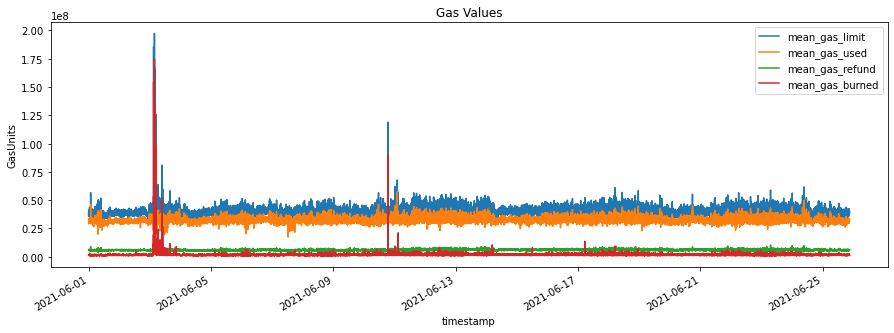

In [6]:
# There are 4 GasUnit features. Note that GasLimit is the sum of the other 3.
gasunit_features = ['mean_gas_limit','mean_gas_used','mean_gas_refund','mean_gas_burned']

# GasUnit dataframe:
gas_unit = gas_df[gasunit_features]
gas_unit.plot(title='Gas Values', ylabel='GasUnits', figsize=(15,5))
plt.show()

We see that, in general terms, the variance for the 4 features is low, except for some peaks of GasLimit and GasBurned in particular dates, for example, on 3rd June. We zoom the plot.

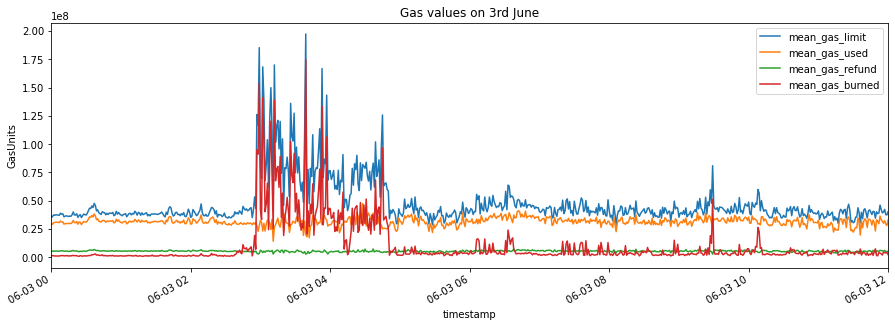

In [7]:
fig = gas_unit.plot(title='Gas values on 3rd June', ylabel='GasUnits', figsize=(15,5))
fig.set_xlim(pd.Timestamp('2021-06-03 00:00:00'), pd.Timestamp('2021-06-03 12:00:00'))
plt.show()

As we can see, GasLimit may increase fastly, but GasUsed and GasRefund stay in the same interval. The only value that increases together with GasLimit is GasBurned. This shows Filecoin VM mechanism to avoid fast increasements in BaseFee.

## Gas daily values

We want to show an overview of how GasLimit is distributed among the 3 features that form it: GasUsed, GasBurned and GasRefund. This overview is shown in a daily frequency.

In [8]:
# Define the df and show the first 10 rows.
gas_unit_daily = gas_daily_df[gasunit_features]
gas_unit_daily[:10]

,mean_gas_limit,mean_gas_used,mean_gas_refund,mean_gas_burned
timestamp,,,,
2021-06-01 00:00:00+00:00,3.817848e+07,3.119158e+07,5.673901e+06,1.313000e+06
2021-06-02 00:00:00+00:00,3.858823e+07,3.150599e+07,5.689440e+06,1.392805e+06
2021-06-03 00:00:00+00:00,4.425240e+07,3.237269e+07,5.506160e+06,6.373550e+06
2021-06-04 00:00:00+00:00,3.829731e+07,3.143874e+07,5.518005e+06,1.340571e+06
2021-06-05 00:00:00+00:00,3.946549e+07,3.238955e+07,5.662703e+06,1.413234e+06
2021-06-06 00:00:00+00:00,3.964267e+07,3.248954e+07,5.734728e+06,1.418398e+06
2021-06-07 00:00:00+00:00,3.839929e+07,3.125157e+07,5.552710e+06,1.595008e+06
2021-06-08 00:00:00+00:00,3.894778e+07,3.186987e+07,5.609764e+06,1.468148e+06
2021-06-09 00:00:00+00:00,3.921072e+07,3.209224e+07,5.613815e+06,1.504661e+06


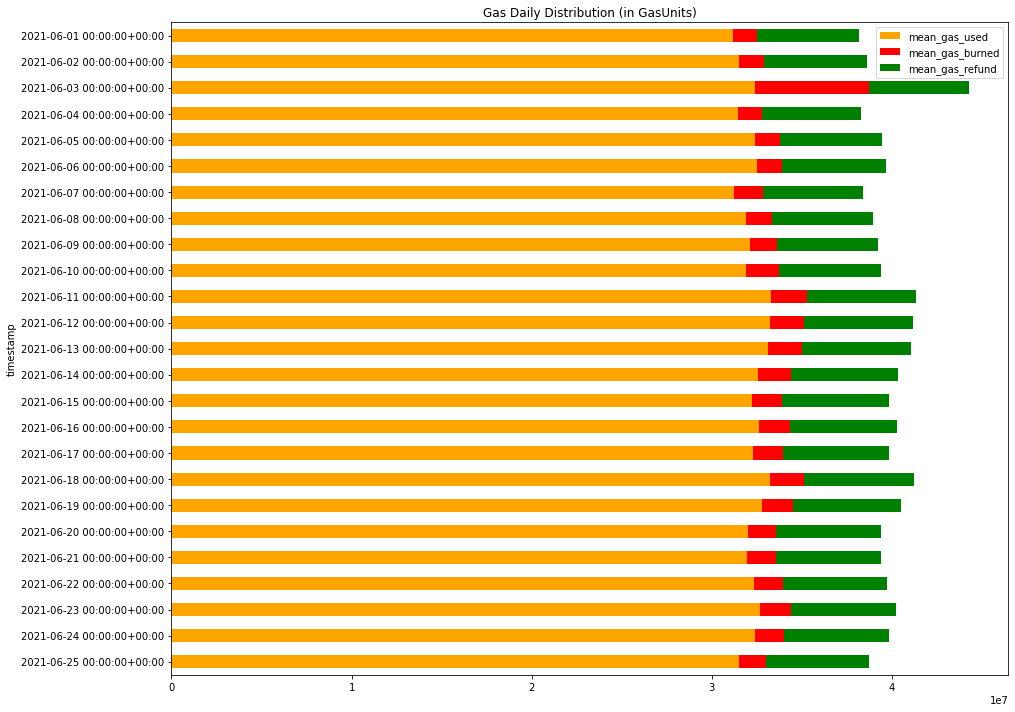

In [9]:
# Since GasLimit is the sum of the other 3 columns, we drop it to show the distribution
gas_distribution = ['mean_gas_used','mean_gas_burned','mean_gas_refund']
#Gas Daily distribution:
gas_dd = gas_unit_daily[gas_distribution]

# We use a stacked bar plot, with horizontal bars, one per day:
gas_dd.plot.barh(title='Gas Daily Distribution (in GasUnits)', stacked=True, figsize=(15,12),
                 color=['orange','red','green'])
# Dates increase in y-axis as it goes down
plt.gca().invert_yaxis()
plt.show()

We can see that GasUsed takes the largest part of GasLimit. Nevertheless, the overestimation burn coming from GasBurned is not negligible, and it goes larger when GasLimit increases, as we saw in detail before.

## 2nd group: attoFIL per GasUnit features

We analyse now the evolution of Fees per GasUnit.

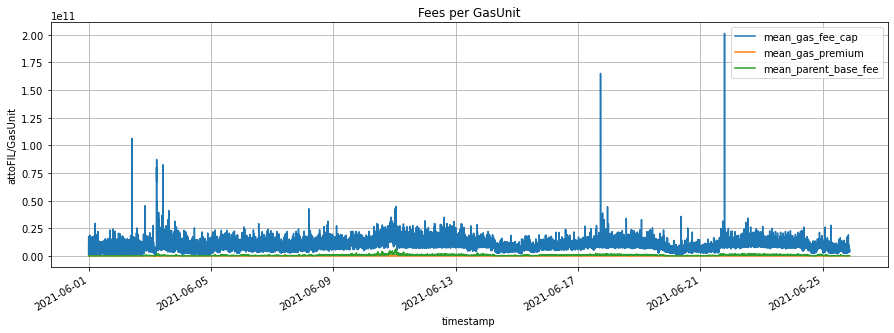

In [10]:
# We study fees per GasUnit ('fpgu'), in particular: GasFeeCap, GasPremium and ParentBaseFee.
feepergasunit_features = ['mean_gas_fee_cap','mean_gas_premium','mean_parent_base_fee']

#Fee per GasUnit dataframe:
fpgu = gas_df[feepergasunit_features]
fpgu.plot(title='Fees per GasUnit', grid=True, ylabel='attoFIL/GasUnit', figsize=(15,5))
plt.show()

The order of magnitude of GasFeeCap is larger than the other Fees, so we do a separate analysis for it.
<br> Focusing on GasFeeCap, some peaks can be seen between June 2nd and June 3rd. We zoom to obtain the details.

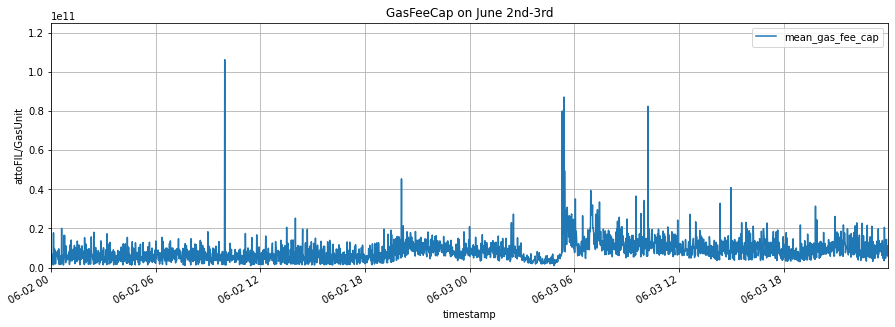

In [11]:
# GasFeeCap plot on June 2nd-3rd
fig = fpgu.mean_gas_fee_cap.plot(title='GasFeeCap on June 2nd-3rd', ylabel='attoFIL/GasUnit', grid=True,
                                 figsize=(15,5))
fig.set_xlim(pd.Timestamp('2021-06-02 00:00:00'), pd.Timestamp('2021-06-03 23:59:00'))
fig.legend()
fig.set_ylim(0, 1.25e11)
plt.show()

The first peak is an isolated GasFeeCap value at 09:57, as we verify here:

In [12]:
# Get values around June 3rd 09:57.
fpgu['2021-06-02 09:55:00':'2021-06-02 10:00:00']

,mean_gas_fee_cap,mean_gas_premium,mean_parent_base_fee
timestamp,,,
2021-06-02 09:55:00+00:00,8.025562e+09,109192.210304,1040.263514
2021-06-02 09:56:00+00:00,3.200770e+09,101401.223301,1044.617829
2021-06-02 09:57:00+00:00,1.061879e+11,99154.910787,1022.115977
2021-06-02 09:58:00+00:00,3.785971e+09,107998.408613,1025.978992
2021-06-02 09:59:00+00:00,1.345157e+09,105407.008636,1099.053541
2021-06-02 10:00:00+00:00,8.473998e+09,117969.934928,1269.861244


However, in the 'GasFeeCap on June 2nd-3rd' plot we can also see a growing tendance that is not an isolated value: it jumps on June 3rd between 5am and 6am, and then it establishes in a higher mean value than the mean value before this jump. 
<br> This event is an important remark that shows how Filecoin VM works. In particular, we find that GasFeeCap increases just after GasLimit increased on June 3rd, as we saw when Gas demand increased in the 1st group.
<br> We plot GasFeeCap and GasLimit together and compute the mean increasement in GasFeeCap, to illustrate this event.

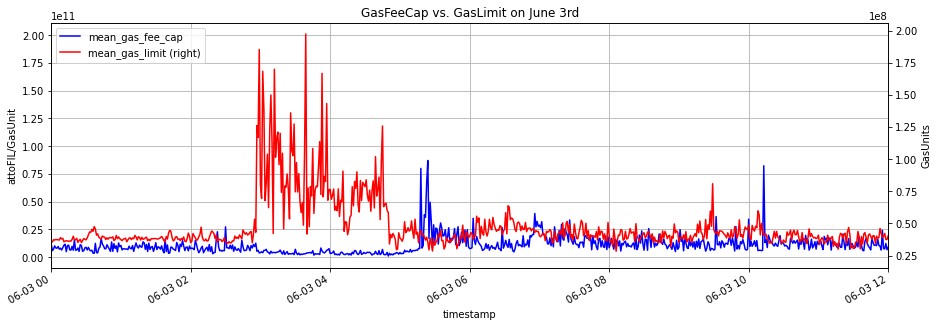

GasFeeCap's mean increased 99.8169 % after the jump registered between 5am-6am.


In [13]:
# Get plot for both GasFeeCap and GasLimit (right axis)
plt.figure(figsize=(15,5))
plt.title('GasFeeCap vs. GasLimit on June 3rd')

ax1 = gas_df.mean_gas_fee_cap.plot(color='blue', grid=True)
ax1.set_ylabel('attoFIL/GasUnit')

ax2 = gas_df.mean_gas_limit.plot(color='red', secondary_y=True, grid=True)
ax2.set_ylabel('GasUnits')
plt.xlim(pd.Timestamp('2021-06-03 00:00:00'), pd.Timestamp('2021-06-03 12:00:00'))

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=2)
plt.show()


# Mean of GasFeeCap before 5am on June 3rd
mean_before = fpgu['2021-06-03 00:00:00':'2021-06-03 05:00:00']['mean_gas_fee_cap'].mean()
# Mean of GasFeeCap after 6am on June 3rd
mean_after = fpgu['2021-06-03 06:00:00':'2021-06-03 12:00:00']['mean_gas_fee_cap'].mean()
# Mean increasement
mean_increasement = (mean_after/mean_before)*100 - 100

print('GasFeeCap\'s mean increased %.4f %% after the jump registered between 5am-6am.' %(mean_increasement) )

In [14]:
# Code for getting the same plot only with GasFeeCap:
#fig = fpgu.mean_gas_fee_cap.plot(title='GasFeeCap on June 3rd', ylabel='attoFIL/GasUnit', grid=True,
#                                 figsize=(15,5))
#fig.set_xlim(pd.Timestamp('2021-06-03 00:00:00'), pd.Timestamp('2021-06-03 12:00:00'))
#fig.set_ylim(0, 1.25e11)
#plt.show()

We move to Parent BaseFee, which indicates the parent tipset that determines the fee used in the current block, as introduced in Ethereum's EIP1559.
<br> In our dataset, we see that Parent BaseFee shows a particularly high variance, with minimum values in 100, maximum values around 1e9, and a standard deviation of 5.2e8. Its behaviour is shown in the following plot.

<i> (Note: I am not sure about how to explain these fluctuations...) </i>

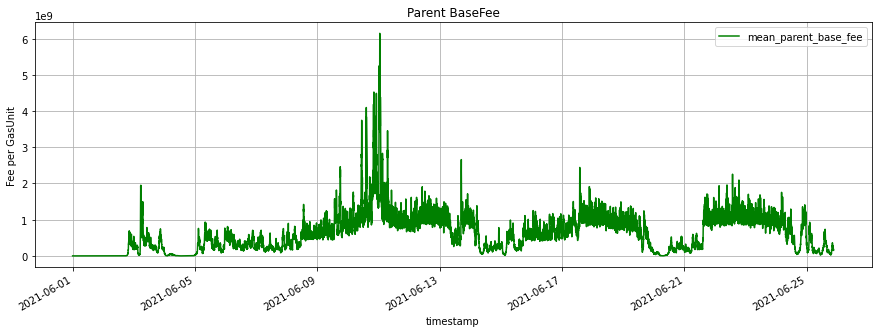

In [15]:
# Plot Parent_BaseFee
fpgu.mean_parent_base_fee.plot(title='Parent BaseFee', color='green',
                               ylabel='Fee per GasUnit', grid=True, figsize=(15,5))
plt.legend()
plt.show()

The following plot shows GasPremium fluctuations. We can see it also has high variance, with some local maxima getting up to 1e9. GasPremium leads to miners' tips.

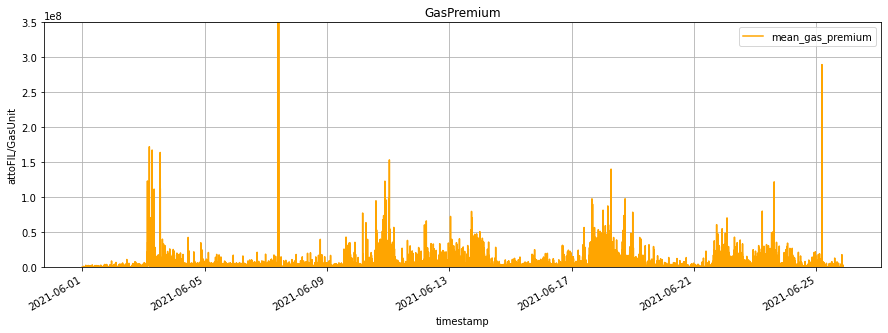

In [16]:
fig = fpgu.mean_gas_premium.plot(title='GasPremium', color='orange',
                               ylabel='attoFIL/GasUnit', grid=True, figsize=(15,5))
#plt.xlim(pd.Timestamp('2021-06-07 09:40:00'), pd.Timestamp('2021-06-07 10:20:00'))
plt.legend()
fig.set_ylim(0, 3.5e8)
plt.show()

## 3rd group: attoFIL features

In this group we evaluate the remaining 2 features, which describe how much attoFIL is burned after the BaseFee burn and the Overestimation burn. It is important to note that BaseFee burn and Overestimation burn can be computed from 
previously described features, such as Parent BaseFee, GasUsed and GasBurned, as we can see in the code in https://github.com/filecoin-project/lotus/blob/v0.10.0/chain/vm/burn.go#L70-L102. In consequence, the behaviour of the new plots is going to be a reflection of plots already obtained. 

The formulas in the code are:
<br> $BaseFeeBurned = Parent\_BaseFee * GasUsed$
<br> $OverestimationBurned = Parent\_BaseFee * GasBurned$

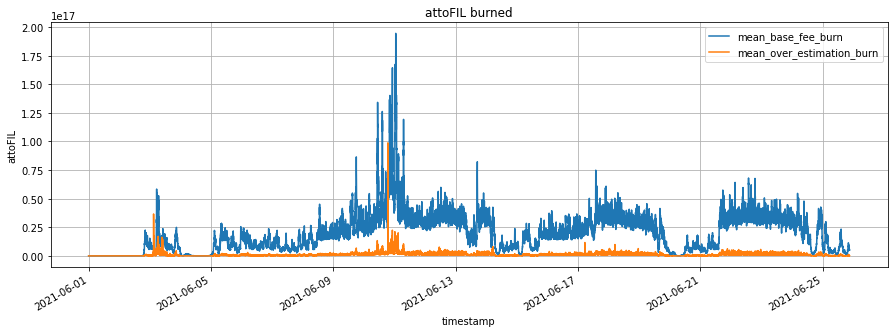

In [17]:
# Two features analyzed: BaseFeeBurn and OverestimationBurn
attoFIL_features = ['mean_base_fee_burn','mean_over_estimation_burn']

# attoFIL dataframe:
attoFIL_df = gas_df[attoFIL_features]
attoFIL_df.plot(title='attoFIL burned', grid=True, ylabel='attoFIL', figsize=(15,5))
plt.show()

BaseFeeBurn reveals to be in a higher order of magnitude than OverestimationBurn. Moreover, BaseFeeBurn has a similar shape as Parent BaseFee. This can be explained from the formula,
<br> $BaseFeeBurned = Parent\_BaseFee * GasUsed,$
<br> and the fact that GasUsed has a low variance and a regular shape all along the x-axis (as it can be seen in the 1st group plots). In the following plot we show together BaseFeeBurn and Parent BaseFee.

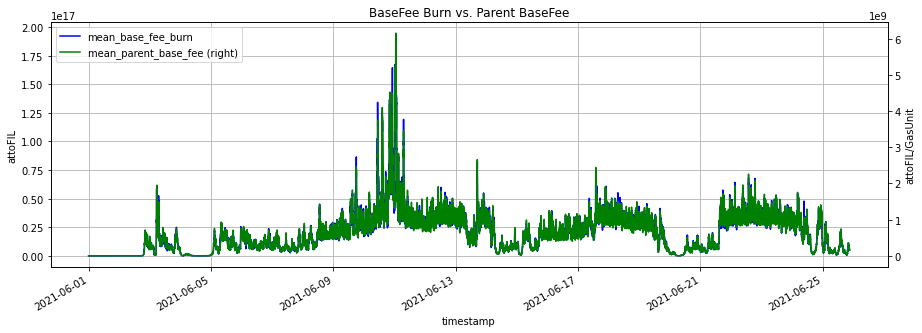

In [18]:
# Get plot for both BaseFee Burn and Parent BaseFee (right axis)
plt.figure(figsize=(15,5))
plt.title('BaseFee Burn vs. Parent BaseFee')

ax1 = gas_df.mean_base_fee_burn.plot(color='blue', grid=True)
ax1.set_ylabel('attoFIL')

ax2 = gas_df.mean_parent_base_fee.plot(color='green', secondary_y=True, grid=True)
ax2.set_ylabel('attoFIL/GasUnit')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

On the other hand, Overestimation Burn comes from the formula
<br> $OverestimationBurned = Parent\_BaseFee * GasBurned,$
<br> and, in this case, GasBurned did have some peaks far from its mean. In consequence, OverestimationBurned has a shape that follows both type of fluctuations, those from Parent BaseFee and those from GasBurned, as we can see in the following two plots.

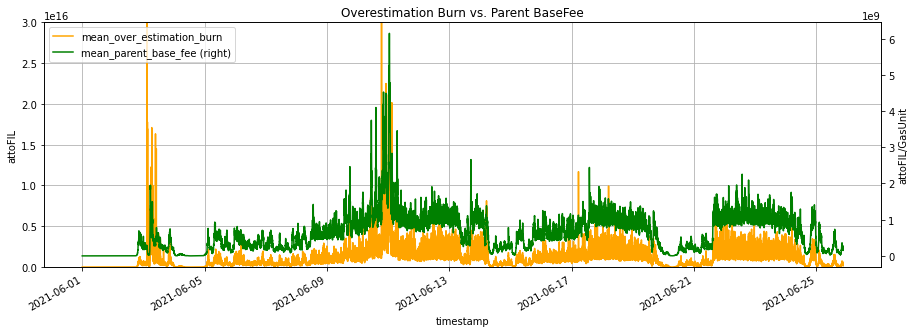

In [19]:
# Get plot for both Overestimation Burn and Parent BaseFee (right axis)
plt.figure(figsize=(15,5))
plt.title('Overestimation Burn vs. Parent BaseFee')

ax1 = gas_df.mean_over_estimation_burn.plot(color='orange', grid=True)
ax1.set_ylabel('attoFIL')
ax1.set_ylim(0,0.3e17)

ax2 = gas_df.mean_parent_base_fee.plot(color='green', secondary_y=True, grid=True)
ax2.set_ylabel('attoFIL/GasUnit')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

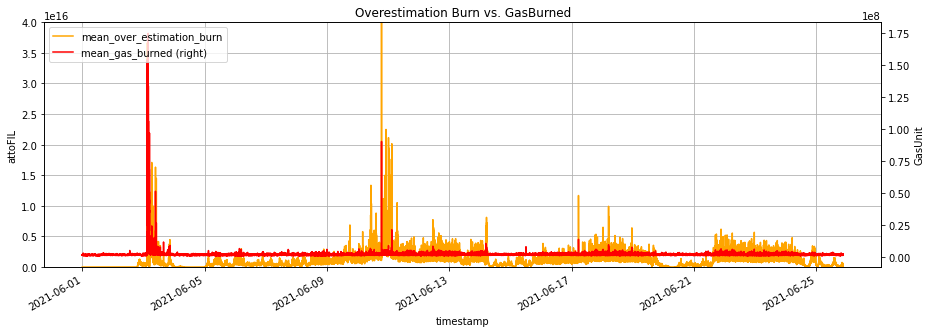

In [20]:
# Get plot for both Overestimation Burn and GasBurned (right axis)
plt.figure(figsize=(15,5))
plt.title('Overestimation Burn vs. GasBurned')

ax1 = gas_df.mean_over_estimation_burn.plot(color='orange', grid=True)
ax1.set_ylabel('attoFIL')
ax1.set_ylim(0,0.4e17)

ax2 = gas_df.mean_gas_burned.plot(color='red', secondary_y=True, grid=True)
ax2.set_ylabel('GasUnit')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

As a particular remark, there are two peaks in GasBurned (as we saw in the first group, for the two peaks in GasLimit): one on June 3rd and another one on June 10th. Note that on June 3rd the peak in GasBurned does not coincide with high values in Parent BaseFee, but this happens on June 10th. In consequence, the values of attoFIL burned on June 10th from the Overestimation Burn are particularly high, getting up to 1e17 attoFIL burned.

The next cell remains commented. It gets a dataframe that comprises all the data regarding attoFIL burned, and it can also be used to verify the consistence of the formulas obtained from the code.

In [21]:
# Build a column summing up all the attoFIL burned
# gas_df['mean_attoFIL_burned'] = gas_df['mean_base_fee_burn'] + gas_df['mean_over_estimation_burn']

# We include the features needed for computations,
# BaseFeeBurned = Parent_BaseFee * GasUsed
# OverestimationBurned = Parent_BaseFee * GasBurned

# attoFIL_comp_features = ['mean_parent_base_fee','mean_gas_used','mean_gas_burned',
#                         'mean_base_fee_burn','mean_over_estimation_burn','mean_attoFIL_burned']

# attoFIL dataframe:
# attoFIL_comp_df = gas_df[attoFIL_features]

# attoFIL_comp_df.head()

# Computation to confirm coincidence between features:
# gas_df['coincidence_1'] = gas_df['mean_base_fee_burn'] / (gas_df['mean_parent_base_fee'] * gas_df['mean_gas_used'])
# gas_df['coincidence_2'] = gas_df['mean_over_estimation_burn'] / (gas_df['mean_parent_base_fee'] * gas_df['mean_gas_burned'])

# The mean for both new columns is close to 1:
# gas_df.describe()

## GasFeeCap vs. GasLimit

In order to finish our analysis, we compare GasFeeCap and GasLimit. As it is explained in https://filecoin.io/blog/posts/filecoin-features-gas-fees/, the only values the message sender has to specify are GasFeeCap and GasLimit for each message. We put both features together to see how the specified values evolve over time. We already provided a first analysis of this plot for a specific date, June 3rd. We provide here a plot over the whole data set.

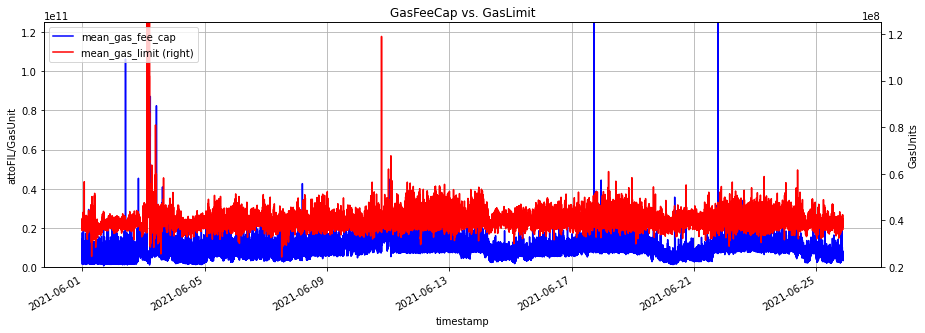

In [22]:
message_sender_features = ['mean_gas_fee_cap','mean_gas_limit']
# Message sender dataframe:
ms_df = gas_df[message_sender_features]

# Get plot for both GasFeeCap and GasLimit (right axis)
plt.figure(figsize=(15,5))
plt.title('GasFeeCap vs. GasLimit')

ax1 = ms_df.mean_gas_fee_cap.plot(color='blue', grid=True)
ax1.set_ylabel('attoFIL/GasUnit')
ax1.set_ylim(0,1.25e11)

ax2 = ms_df.mean_gas_limit.plot(color='red', secondary_y=True, grid=True)
ax2.set_ylabel('GasUnits')
ax2.set_ylim(0.2e8,1.25e8)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

## FURTHER ANALYS

1) The fluctuation of many of the features studied here depends on the global mechanism of Filecoin VM. In particular, it would be interesting to know how the global Gas demand evolves, and how the size of blocks (i.e., nº of GasUnits per block) varies. As in Ethereum network, we would expect that more demand would bring larger blocks. However, this event implies an exponential increasement of the BaseFee, as introudced in EIP1559. A high increasement of BaseFee should push message senders to wait until Fee gets down again.
<br> Studying the overall demand in the network, and how it correlates to BaseFee and the size of the blocks, can be a new direction for the current analysis. 

2) In this work we weren't able to make clear BaseFee evolution. Why does it have an initial value in 1000, at t = 0 ? May a larger period of time, before and after June 1st-25th, be a useful dataset regarding this concern ?

3) Some predictions can be done, based on time series forecasting. For example, one could study level, trend, seasonality and noise of BaseFee. However, in order to forecast, we should also take into account message senders' strategies. Those strategies have a direct impact on the ecosystem, and they can't be deduced from the features registered in this dataset.

4) Following from our previous remark, a further analysis implies an understanding of agent's dynamics. This would not be based just on analysing the data fluctuations, but would also require simulations leading to accurate predictions.